In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics


In [77]:
data = pd.read_csv('C:/Users/brian/OneDrive/Escritorio/Brian/universidad/2023-1/Auto ll/Lab 1/Heart_disease_details.csv')
datos = data.copy()

In [78]:
datos.dtypes

Name                                               object
Gender                                             object
Age                                                 int64
Chest pain                                          int64
Shortness of breath                                 int64
Fatigue                                             int64
Systolic                                            int64
Diastolic                                           int64
Heart rate (bpm)                                    int64
Lung sounds                                         int64
Cholesterol level (mg/dL)                           int64
LDL level (mg/dL)                                   int64
HDL level (mg/dL)                                   int64
Diabetes                                            int64
Atrial fibrillation                                 int64
Mitral valve prolapse                               int64
Rheumatic fever                                     int64
Mitral stenosi

In [79]:
objects = datos.select_dtypes(include="object").copy()
objects

,Name,Gender,Echocardiogram,Blood culture,EKG,Cardiac CT,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,Jane Doe,Female,None,None,Shows evidence of left ventricular hypertrophy,Shows a 50% blockage in the left anterior desc...,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,None,None,Shows evidence of left ventricular hypertrophy,Shows a 60% blockage in the right coronary artery,None,None,None,None,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,None,None,Shows evidence of left ventricular hypertrophy,Shows a 75% blockage in the left anterior desc...,None,None,None,None,Coronary artery disease (CAD),"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,None,None,Shows evidence of left ventricular hypertrophy,Shows a 80% blockage in the left circumflex co...,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,None,None,Shows evidence of left ventricular hypertrophy,Shows a 90% blockage in the right coronary artery,None,None,None,None,Coronary artery disease (CAD),"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Emily Wilson,Female,None,None,Shows evidence of atrial enlargement and low v...,Shows constrictive pericarditis,None,None,None,None,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy
330,Jacob Smith,Male,None,None,Shows evidence of atrial fibrillation,Shows constrictive pericarditis,None,None,None,None,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy
331,Jane Smith,Female,None,None,Shows evidence of left ventricular hypertrophy...,Shows constrictive pericarditis,None,None,None,None,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy
332,David Johnson,Male,None,None,Shows evidence of right ventricular hypertrophy,Shows constrictive pericarditis,None,None,None,None,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy


In [80]:
objects.dtypes

Name                        object
Gender                      object
Echocardiogram              object
Blood culture               object
EKG                         object
Cardiac CT                  object
Chest x-ray                 object
Previous illnesses          object
Pulmonary function tests    object
Spirometry                  object
Diagnosis                   object
Medications                 object
Treatment                   object
dtype: object

In [81]:
datos[datos.columns[-1]] = LabelEncoder().fit_transform(datos[datos.columns[-1]])
datos[objects.columns] = OrdinalEncoder().fit_transform(datos[objects.columns])
datos

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,84.0,0.0,55,1,1,1,140,90,100,1,...,17.0,0,1,0.0,2.0,0.0,0.0,8.0,27.0,0.0
1,119.0,1.0,57,1,1,1,150,80,110,1,...,25.0,0,1,0.0,2.0,0.0,0.0,8.0,32.0,0.0
2,36.0,0.0,60,1,1,1,130,85,95,1,...,37.0,0,1,0.0,2.0,0.0,0.0,8.0,22.0,0.0
3,170.0,1.0,62,1,1,1,145,90,100,1,...,39.0,0,1,0.0,2.0,0.0,0.0,8.0,27.0,0.0
4,10.0,0.0,58,1,1,1,135,80,105,1,...,42.0,0,1,0.0,2.0,0.0,0.0,8.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,47.0,0.0,55,1,1,1,130,80,120,1,...,76.0,0,1,0.0,2.0,0.0,0.0,7.0,59.0,28.0
330,75.0,1.0,48,1,1,1,130,80,120,1,...,76.0,0,1,0.0,2.0,0.0,0.0,7.0,59.0,28.0
331,86.0,0.0,65,1,1,1,140,90,110,1,...,76.0,0,1,0.0,2.0,0.0,0.0,7.0,59.0,28.0
332,28.0,1.0,68,1,1,1,140,90,110,0,...,76.0,0,1,0.0,2.0,0.0,0.0,7.0,59.0,28.0


In [84]:
X = datos.iloc[:,:-1]
y = datos.iloc[:,-1:]

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7, shuffle=True)
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

In [87]:
print(f"el tamaño de X_train es de: {X_train.shape}")
print(f"el tamaño de X_test es de: {X_test.shape}")
print(f"el tamaño de y_train es de: {y_train.shape}")
print(f"el tamaño de y_train es de: {y_test.shape}")

el tamaño de X_train es de: (283, 48)
el tamaño de X_test es de: (51, 48)
el tamaño de y_train es de: (283, 1)
el tamaño de y_train es de: (51, 1)


In [98]:
def normalizacion (x):
    x_normalizada = (x-X_train.min())/(X_train.max()-X_train.min())
    return x_normalizada

In [102]:
X_train_normalizada = normalizacion(X_train)
X_train_normalizada.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,EKG,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications
299,0.958824,0.0,0.375000,1.0,1.0,1.0,0.4,0.250,0.833333,1.0,...,0.655172,0.9625,0.0,0.0,0.000000,0.4,0.00,0.0,0.200000,0.622449
264,0.135294,0.0,0.166667,1.0,1.0,1.0,0.4,0.250,1.000000,1.0,...,0.017241,0.0000,1.0,0.0,0.583333,0.4,0.25,0.0,0.800000,0.734694
194,0.505882,0.0,0.097222,1.0,0.0,1.0,0.5,0.375,0.916667,0.0,...,0.344828,0.0000,0.0,0.0,0.000000,0.4,0.00,0.0,0.033333,0.928571
300,0.511765,1.0,0.236111,1.0,0.0,1.0,0.4,0.250,0.833333,1.0,...,0.689655,0.9625,0.0,0.0,0.000000,0.4,0.00,0.0,0.200000,0.132653
228,0.247059,0.0,0.305556,1.0,0.0,1.0,0.4,0.250,0.666667,1.0,...,0.344828,0.0000,0.0,0.0,0.000000,0.4,0.00,0.0,0.500000,0.918367


In [128]:
X_test_normalizada = normalizacion(X_test)
X_test_normalizada.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,EKG,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications
304,0.817647,1.0,0.236111,1.0,1.0,1.0,0.4,0.25,1.000000,1.0,...,0.431034,0.0875,0.0,0.0,0.0,0.4,0.0,0.0,0.400000,0.285714
243,0.982353,0.0,0.083333,1.0,1.0,1.0,0.4,0.25,0.833333,1.0,...,0.017241,0.0000,0.0,0.0,1.0,0.4,1.0,0.0,0.600000,0.867347
65,0.211765,0.0,0.125000,1.0,1.0,1.0,0.2,0.00,0.333333,1.0,...,0.327586,0.6875,0.0,1.0,0.0,0.4,0.0,0.0,0.300000,0.030612
73,0.182353,1.0,0.027778,0.0,1.0,1.0,0.4,0.25,0.666667,0.0,...,0.362069,0.6125,0.0,1.0,0.0,0.4,0.0,0.0,0.333333,0.418367
328,0.494118,0.0,0.541667,1.0,1.0,1.0,0.2,0.25,0.500000,1.0,...,1.017241,0.9500,0.0,1.0,0.0,0.4,0.0,0.0,0.233333,0.602041


In [329]:
X_normalizada = normalizacion(X)
X_normalizada.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,EKG,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications
0,0.494118,0.0,0.444444,1.0,1.0,1.0,0.6,0.500,0.666667,1.0,...,0.431034,0.2125,0.0,1.0,0.0,0.4,0.0,0.0,0.266667,0.275510
1,0.700000,1.0,0.472222,1.0,1.0,1.0,0.8,0.250,0.833333,1.0,...,0.431034,0.3125,0.0,1.0,0.0,0.4,0.0,0.0,0.266667,0.326531
2,0.211765,0.0,0.513889,1.0,1.0,1.0,0.4,0.375,0.583333,1.0,...,0.431034,0.4625,0.0,1.0,0.0,0.4,0.0,0.0,0.266667,0.224490
3,1.000000,1.0,0.541667,1.0,1.0,1.0,0.7,0.500,0.666667,1.0,...,0.431034,0.4875,0.0,1.0,0.0,0.4,0.0,0.0,0.266667,0.275510
4,0.058824,0.0,0.486111,1.0,1.0,1.0,0.5,0.250,0.750000,1.0,...,0.431034,0.5250,0.0,1.0,0.0,0.4,0.0,0.0,0.266667,0.336735


# KNN

In [132]:
ks = range(1,30)
scores_knn = {}
scores_list_knn = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_normalizada, y_train.values.ravel())
    y_pred = knn.predict(X_test_normaliza)
    scores_knn[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list_knn.append(metrics.accuracy_score(y_test, y_pred))
    print(f'el score en el k #{k} es : {scores_knn[k]*100:.2f}%')


el score en el k #1 es : 58.82%
el score en el k #2 es : 58.82%
el score en el k #3 es : 62.75%
el score en el k #4 es : 64.71%
el score en el k #5 es : 62.75%
el score en el k #6 es : 62.75%
el score en el k #7 es : 68.63%
el score en el k #8 es : 66.67%
el score en el k #9 es : 62.75%
el score en el k #10 es : 58.82%
el score en el k #11 es : 58.82%
el score en el k #12 es : 60.78%
el score en el k #13 es : 58.82%
el score en el k #14 es : 56.86%
el score en el k #15 es : 58.82%
el score en el k #16 es : 58.82%
el score en el k #17 es : 58.82%
el score en el k #18 es : 58.82%
el score en el k #19 es : 60.78%
el score en el k #20 es : 62.75%
el score en el k #21 es : 60.78%
el score en el k #22 es : 60.78%
el score en el k #23 es : 60.78%
el score en el k #24 es : 60.78%
el score en el k #25 es : 58.82%
el score en el k #26 es : 58.82%
el score en el k #27 es : 58.82%
el score en el k #28 es : 54.90%
el score en el k #29 es : 54.90%


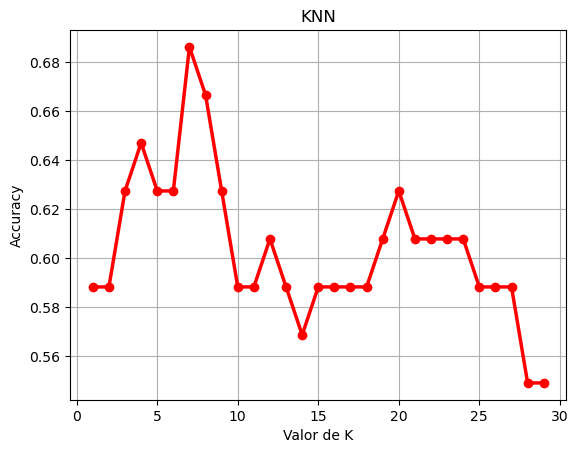

In [523]:
plt.plot(ks, scores_list_knn, color='r', linewidth = 2.5, marker = 'o')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.grid()

In [143]:
cont = 0
for i in scores_knn.values():
    cont+=1
    if i==np.max(scores_list):
            print(f"la mejor k es la #{cont} con {np.max(scores_list_knn)*100:.2f}%")

la mejor k es la #7 con 68.63%


In [443]:
def model_knn(n,x,y):
    model = KNeighborsClassifier(n_neighbors=n, weights='distance')
    cv_results = cross_val_score(model, x, y.values.ravel(),scoring='accuracy', cv= kfold )
    return print(f"accuracy: {cv_results.mean()*100:.2f}%")

In [444]:
model_knn(7, X_train_normalizada, y_train)

accuracy: 62.52%


In [445]:
model_knn(7, X_test_normalizada, y_test)

accuracy: 19.64%


El modelo sigue en underfifting

El modelo sigue muy parecido que en el laboratorio anterior subio 2% en los resultados siendo poco significativo, con lo que podemos concluir que KNN no es un buen modelo para este problema.

# ÁRBOL DE DECISIONES

In [138]:
ds = range(1,datos.shape[1])
scores_ds = {}
scores_list_ds = []
for d in ds:
    cart = DecisionTreeClassifier(max_depth=d)
    cart.fit(X_train_normalizada, y_train.values.ravel())
    y_pred = cart.predict(X_test_normaliza)
    scores_ds[d] = metrics.accuracy_score(y_test, y_pred)
    scores_list_ds.append(metrics.accuracy_score(y_test, y_pred))
    print(f'el score en el k #{d} es : {scores_ds[d]*100:.2f}%')

el score en el k #1 es : 11.76%
el score en el k #2 es : 21.57%
el score en el k #3 es : 29.41%
el score en el k #4 es : 33.33%
el score en el k #5 es : 41.18%
el score en el k #6 es : 47.06%
el score en el k #7 es : 50.98%
el score en el k #8 es : 52.94%
el score en el k #9 es : 60.78%
el score en el k #10 es : 66.67%
el score en el k #11 es : 76.47%
el score en el k #12 es : 76.47%
el score en el k #13 es : 76.47%
el score en el k #14 es : 76.47%
el score en el k #15 es : 74.51%
el score en el k #16 es : 76.47%
el score en el k #17 es : 74.51%
el score en el k #18 es : 74.51%
el score en el k #19 es : 76.47%
el score en el k #20 es : 76.47%
el score en el k #21 es : 74.51%
el score en el k #22 es : 74.51%
el score en el k #23 es : 76.47%
el score en el k #24 es : 74.51%
el score en el k #25 es : 74.51%
el score en el k #26 es : 74.51%
el score en el k #27 es : 74.51%
el score en el k #28 es : 74.51%
el score en el k #29 es : 76.47%
el score en el k #30 es : 74.51%
el score en el k #3

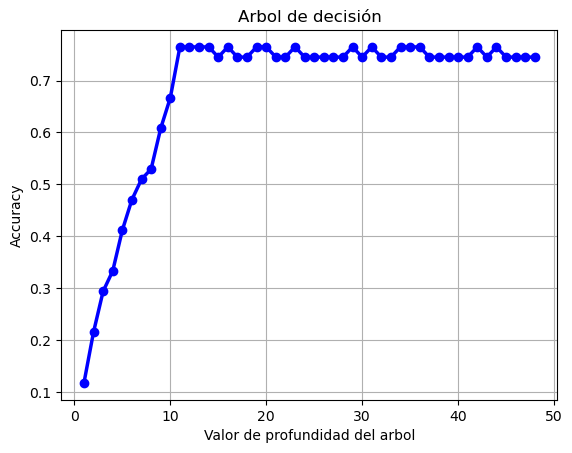

In [524]:
plt.plot(ds, scores_list_ds, color='b', linewidth = 2.5, marker = 'o')
plt.xlabel('Valor de profundidad del arbol')
plt.ylabel('Accuracy')
plt.title('Arbol de decisión')
plt.grid()

In [151]:
cont = 0
for i in scores_ds.values():
    cont+=1
    if i==np.max(scores_list_ds):
            print(f"la mejor profundidad del arbol es {cont} con {np.max(scores_list_ds)*100:.2f}%")
            break

la mejor profundidad del arbol es 11 con 76.47%


In [505]:
model_cart = DecisionTreeClassifier(max_depth=11, criterion='entropy', splitter='best')
cv_results = cross_val_score(model_cart, X_normalizada, y.values.ravel(),scoring='accuracy', cv = kfold)
print(f"accuracy: {cv_results.mean()*100:.2f}%")

accuracy: 86.54%


El criterion y el splitter son muy importantes ya que de estos depende las decisiones que van a tomar en los nodos

In [512]:
def model_rf (n, x, y):
    model_rf = RandomForestClassifier(n_estimators = n, max_depth=20, criterion='entropy')
    cv_results = cross_val_score(model_rf, x, y.values.ravel(), scoring='accuracy', cv=kfold)
    return print(f"accuracy: {cv_results.mean()*100:.2f}%")


In [514]:
model_rf(300, X_train_normalizada,y_train)

accuracy: 85.87%


In [517]:
model_rf(300, X_test_normalizada,y_test)

accuracy: 43.09%


In [522]:
lista = ['X_train','y_train', 'X_test', 'y_test']
lista[0]

'X_train'

In [483]:
rs = range(100,600,100)
results_rf_train = []
results_rf_test = []
for i in rs:
        model_rf = RandomForestClassifier(n_estimators = i,max_depth=11, criterion='entropy')
        cv_results_train = cross_val_score(model_rf, X_train_normalizada, y_train.values.ravel(), scoring='accuracy', cv=kfold)
        results_rf_train.append(cv_results_train.mean())
        cv_results_test = cross_val_score(model_rf, X_test_normalizada, y_test.values.ravel(), scoring='accuracy', cv=kfold)
        results_rf_test.append(cv_results_test.mean())
print(results_rf_train)
print(results_rf_test)

[0.8587719298245615, 0.8551378446115289, 0.8657894736842107, 0.862218045112782, 0.8515664160401002]
[0.3745454545454545, 0.4709090909090909, 0.4727272727272728, 0.41454545454545455, 0.43090909090909085]


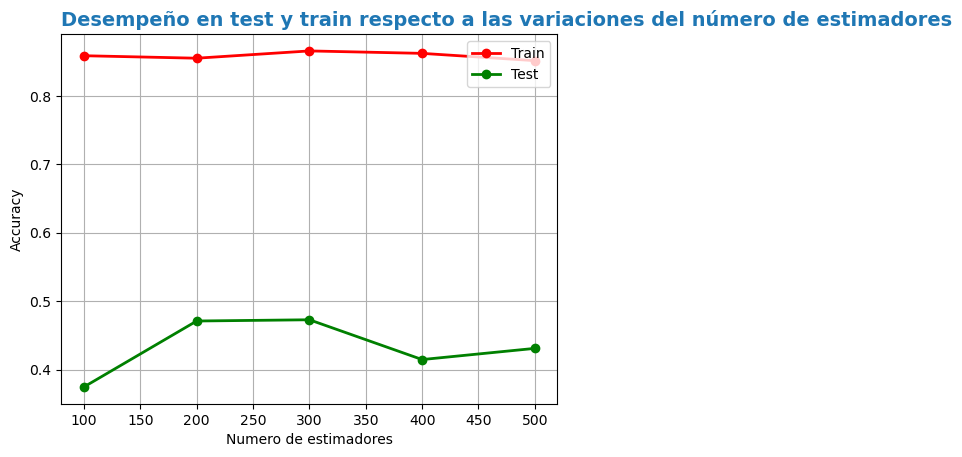

In [502]:
fig, ax = plt.subplots() 
ax.plot(rs, results_rf_train, color='r', linewidth = 2, label = 'Train', marker = 'o')
ax.plot(rs, results_rf_test, color='g', linewidth = 2, label = 'Test', marker = 'o')
ax.legend(loc = 'upper right')
ax.set_title('Desempeño en test y train respecto a las variaciones del número de estimadores', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.grid()
plt.show()

# SVM

In [382]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy = []
for b in range(1,10):
    print(f"con C={b}")
    for i in kernels:
        model_scv = SVC(kernel=i, C=b)
        cv_results = cross_val_score(model_scv, X_normalizada, y.values.ravel(),scoring='accuracy', cv=kfold )
        print(f"accuracy: {cv_results.mean()*100:.2f}% con kernel: {i}")

con C=1
accuracy: 74.29% con kernel: linear
accuracy: 71.89% con kernel: poly
accuracy: 56.60% con kernel: rbf
accuracy: 32.35% con kernel: sigmoid
con C=2
accuracy: 76.68% con kernel: linear
accuracy: 74.58% con kernel: poly
accuracy: 69.19% con kernel: rbf
accuracy: 37.74% con kernel: sigmoid
con C=3
accuracy: 77.88% con kernel: linear
accuracy: 76.68% con kernel: poly
accuracy: 73.09% con kernel: rbf
accuracy: 41.34% con kernel: sigmoid
con C=4
accuracy: 77.88% con kernel: linear
accuracy: 77.28% con kernel: poly
accuracy: 74.29% con kernel: rbf
accuracy: 44.04% con kernel: sigmoid
con C=5
accuracy: 78.18% con kernel: linear
accuracy: 77.28% con kernel: poly
accuracy: 76.98% con kernel: rbf
accuracy: 46.13% con kernel: sigmoid
con C=6
accuracy: 78.48% con kernel: linear
accuracy: 77.58% con kernel: poly
accuracy: 76.98% con kernel: rbf
accuracy: 50.03% con kernel: sigmoid
con C=7
accuracy: 78.48% con kernel: linear
accuracy: 77.58% con kernel: poly
accuracy: 77.58% con kernel: rbf
a

In [508]:
def model_sv(x,y):
    model = SVC(kernel='linear', C=6)
    cv_results = cross_val_score(model, x, y.values.ravel(),scoring='accuracy', cv=kfold )
    return print(f"accuracy: {cv_results.mean()*100:.2f}%")

In [509]:
model_sv(X_train_normalizada, y_train)

accuracy: 80.19%


In [510]:
model_sv(X_test_normalizada, y_test)

accuracy: 39.64%


|      | Train  | Test   |
|------|--------|--------|
| KNN  | 62.52% | 19.64% |
| CART | 85.51% | 36.91% |
| RF   | 85.87% | 43.09% |
| SVM  | 80.19% | 39.64% |

Eligiríamos el modelo de Random Forest ya que fue el mejor desempeño tanto en train como en test

En conclusión aunque los modelos quedaron en overfifting, se observaron mejores resultados al incluir las variables categoricas y probar otros modelos, puede que los modelos no se hayan adaptado lo suficiente a los datos o puede ser que el testeo es muy pequeño en comparación con el entrenamiento.

Sería interesante probar técnicas de Oversampling para ampliar la cantidad de muestras y así analizar el porqué no se ajusta bien el modelo.